In [2]:
import os
import matplotlib.pyplot as mp
import pandas as pd
import plotly as pt
import scipy.stats as stats


In [3]:
%matplotlib notebook

In [5]:
#Creat a csv for each date
path_M = os.path.join('Resources/Mike_posts_and_comments.CSV.csv') 
Mike_df = pd.read_csv (path_M)
path_A = os.path.join('Resources/Andres_posts_and_comments.CSV.csv') 
Andres_df = pd.read_csv (path_A)
path_C= os.path.join('Resources/Chey_posts_and_comments.CSV.csv') 
Chey_df = pd.read_csv (path_C)
path_B= os.path.join('Resources/Bruna_posts_and_comments.CSV.csv') 
Bruna_df = pd.read_csv (path_B)


In [6]:
#Filter CSV 
tm_C = Chey_df['reactions/timestamp']
tm_M = Mike_df['Timestamp']
tm_A = Andres_df['reactions/timestamp']
tm_B = Bruna_df['reactions/timestamp']

In [8]:
#Create columns Year, Month, Day, Hour

#Chey
Chey_df['Timestamp'] = pd.to_datetime(tm_C,unit='s', yearfirst=True) 
Chey_df['Year']= Chey_df['Timestamp'].dt.year
Chey_df['Month']= Chey_df['Timestamp'].dt.month
Chey_df['Day']= Chey_df['Timestamp'].dt.day
Chey_df['Hour']= Chey_df['Timestamp'].dt.hour

#Mike
Mike_df['Timestamp'] = pd.to_datetime(tm_M,unit='s', yearfirst=True) 
Mike_df['Year']= Mike_df['Timestamp'].dt.year
Mike_df['Month']= Mike_df['Timestamp'].dt.month
Mike_df['Day']= Mike_df['Timestamp'].dt.day
Mike_df['Hour']= Mike_df['Timestamp'].dt.hour

#Andres
Andres_df['Timestamp'] = pd.to_datetime(tm_A,unit='s', yearfirst=True) 
Andres_df['Year']= Andres_df['Timestamp'].dt.year
Andres_df['Month']= Andres_df['Timestamp'].dt.month
Andres_df['Day']= Andres_df['Timestamp'].dt.day
Andres_df['Hour']= Andres_df['Timestamp'].dt.hour

#Bruna
Bruna_df['Timestamp'] = pd.to_datetime(tm_B, unit ='s', yearfirst=True) 
Bruna_df['Year']= Bruna_df['Timestamp'].dt.year
Bruna_df['Month']= Bruna_df['Timestamp'].dt.month
Bruna_df['Day']= Bruna_df['Timestamp'].dt.day
Bruna_df['Hour']= Bruna_df['Timestamp'].dt.hour



In [9]:
#Clean our Data Frame

#Chey
Chey_df.columns = ['stand', 'Reaction','User','Action','Nan0','Nan','Nan1','Nan3','Timestamp','Year','Month','Day','Hour']
Chey2_df = Chey_df.drop(columns=['stand','Nan0','Nan','Nan1','Nan3'])

#Mike
Mike_df = Mike_df.drop(columns=['Uri'])
Mike2_df = Mike_df.reindex(columns = ['Reaction','User','Action','Timestamp','Year',"Month",'Day','Hour'])

#Andres
Andres_df.columns = ['stand', 'Reaction','User','Action','Nan','Timestamp','Year','Month','Day','Hour']
Andres2_df = Andres_df.drop(columns=['stand','Nan'])

#Bruna
Bruna_df.columns = ['stand', 'Reaction','User','Action','Nan','Timestamp','Year','Month','Day','Hour']
Bruna2_df = Bruna_df.drop(columns=['stand','Nan'])

Andres2_df

,Reaction,User,Action,Timestamp,Year,Month,Day,Hour
0,LIKE,Andres Alcaraz,Andres Alcaraz likes Vinicius Gomes's photo.,2021-01-01 00:18:58,2021,1,1,0
1,LIKE,Andres Alcaraz,Andres Alcaraz likes Mario Alcaraz's photo.,2020-12-31 21:17:00,2020,12,31,21
2,LIKE,Andres Alcaraz,Andres Alcaraz likes Mony Vazquez's post.,2020-12-30 03:51:15,2020,12,30,3
3,LIKE,Andres Alcaraz,Andres Alcaraz likes Christian Foster's post i...,2020-12-29 14:46:23,2020,12,29,14
4,LIKE,Andres Alcaraz,Andres Alcaraz likes Mario Alcaraz's photo.,2020-12-29 14:45:43,2020,12,29,14
...,...,...,...,...,...,...,...,...
5905,LIKE,Andres Alcaraz,Andres Alcaraz liked a video.,2014-01-24 03:32:01,2014,1,24,3
5906,LIKE,Andres Alcaraz,Andres Alcaraz liked a video.,2014-01-20 23:40:02,2014,1,20,23
5907,LIKE,Andres Alcaraz,Andres Alcaraz likes Richi Phelps's photo.,2014-01-19 04:46:11,2014,1,19,4
5908,LIKE,Andres Alcaraz,Andres Alcaraz liked a video.,2014-01-15 22:08:17,2014,1,15,22


In [7]:
concat_df = pd.concat([Chey2_df,Mike2_df])
print(concat_df['Reaction'].unique())

['LOVE' 'LIKE' 'HAHA' 'SORRY' 'WOW']


In [8]:
def reactionToNumber(reaction):
    if reaction == "LIKE":
        return 1
    if reaction == "LOVE":
        return 1
    if reaction == "HAHA":
        return 1
    if reaction == 'SORRY':
        return 1
    if reaction == 'WOW':
        return 1
    if reaction == 'ANGER':
        return 1

In [9]:
concat_df['Reaction to Number']= concat_df['Reaction'].map(reactionToNumber)
Bruna2_df['Reaction to Number']= Bruna2_df['Reaction'].map(reactionToNumber)

In [10]:
group_df = concat_df.drop(columns = ['Reaction','User','Action','Timestamp','Month','Day','Hour'])
group_b_df = Bruna2_df.drop(columns = ['Reaction','User','Action','Timestamp','Month','Day','Hour'])

In [11]:
final_df = group_df.groupby('Year').sum()
final_b_df = group_b_df.groupby('Year').sum()


In [12]:
final_b_df.drop([2021])
final_df.drop([2021])

,Reaction to Number
Year,
2011,533
2012,3717
2013,5658
2014,7722
2015,7993
2016,357
2017,587
2018,200
2019,197


In [13]:
final_df['Reaction to Number'] = final_df['Reaction to Number']/2


<IPython.core.display.Javascript object>


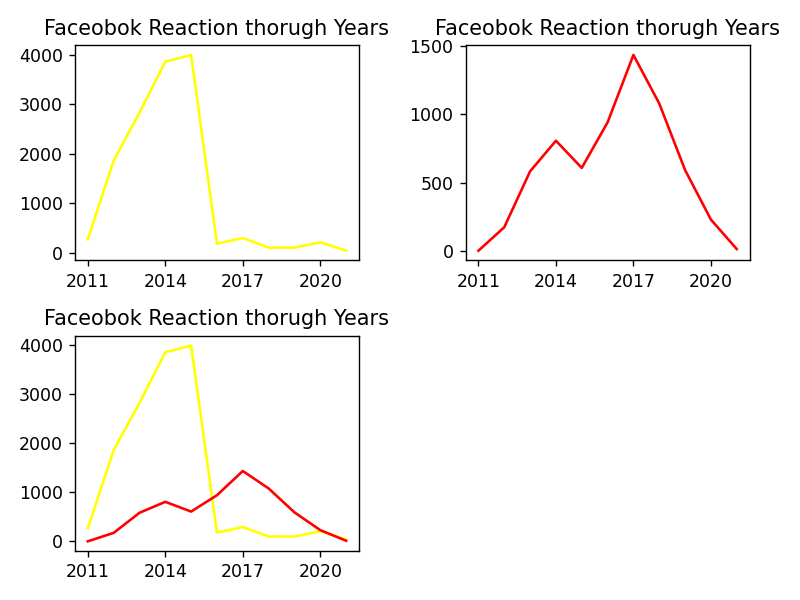

([<matplotlib.axis.XTick at 0x2ac33c63df0>,
 <a list of 4 Text major ticklabel objects>)

In [14]:
mp.subplot(2,2,1)
mp.plot(final_df.index,final_df['Reaction to Number'], color = 'yellow')
mp.title( "Faceobok Reaction thorugh Years")
mp.xticks(ticks = [2011,2014,2017,2020])

In [15]:
mp.subplot(2,2,2)
mp.plot(final_b_df.index,final_b_df['Reaction to Number'], color = 'red')
mp.title( "Faceobok Reaction thorugh Years")
mp.xticks(ticks = [2011,2014,2017,2020])

([<matplotlib.axis.XTick at 0x2ac3482a1f0>,
 <a list of 4 Text major ticklabel objects>)

In [16]:
mp.subplot(2,2,3)
mp.plot(final_df.index,final_df['Reaction to Number'], color = 'yellow')
mp.plot(final_b_df.index,final_b_df['Reaction to Number'], color = 'red')
mp.title("Faceobok Reaction thorugh Years")
mp.xticks(ticks = [2011,2014,2017,2020])

([<matplotlib.axis.XTick at 0x2ac34853c40>,
 <a list of 4 Text major ticklabel objects>)

In [17]:
mp.tight_layout()
mp.show()


In [18]:
stats.ttest_1samp(final_df,final_b_df).pvalue

array([[0.02687292],
       [0.04949228],
       [0.1970747 ],
       [0.38104735],
       [0.21305865],
       [0.53921365],
       [0.70396185],
       [0.73438956],
       [0.20270861],
       [0.06025043],
       [0.02804774]])